Initial Analysis to determine what financial features to engineer
-----
The purpose of this notebook is just to look at the data I am using, and decide on what features I want to use and engineer

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
from IPython.display import Image, HTML, display
%matplotlib inline

/Users/Angus/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
# To look more visually appealing
style.use('ggplot')

# Specify the range of dates to view stocks
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)


In [74]:
# Grab Tesla Stock prices from Google Finance from start to end time
df = web.DataReader('TSLA', 'google', start, end)

Keep in mind that these stock prices are split adjusted but not dividend adjusted

In [5]:
# Put into a csv file
df.to_csv("./stock_price/tsla.csv")

In [6]:
# Read the csv file into a pandas data frame
df = pd.read_csv("./stock_prices/tsla.csv",parse_dates=True, index_col=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ae06cc0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x111617f60>], dtype=object)

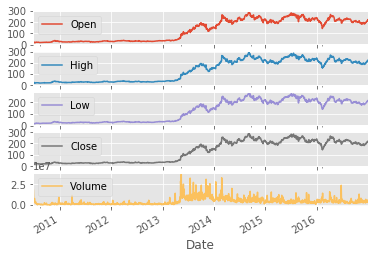

In [7]:
# Make seperate plots for each of the columns
df.plot(subplots=True)

What is the significance of the moving average? 
---
100-day moving average takes the past 100 days of stock prices and averages them. Traders use these values as an aid in choosing where to enter or exit. The moving averages indicate to a trader any up or down trends in the stock as the x-day moving average represents the average price that traders have paid over a x time. 

Moving averages act as the line for the support/resistance of a stock.

Support/Resistance is where the most trading occurs. Support levels are where demand is strong and the price does not fall any lower whereas resistance is where demand for selling is strong so that prices are prevented from rising higher.



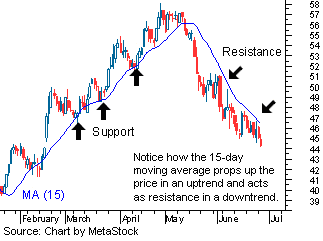

In [4]:
# Source = http://www.investopedia.com/articles/technical/061801.asp
Image("./img/moving_avg.png")

In [9]:
# Calculate 100-day moving average
df['100_mov_avg'] = df['Close'].rolling(window=100, min_periods=0).mean()

Since we are calculating 100-day moving average, the first 99 days will be NA since there is not enough data prior to calcualte the average. Instead, when we add the paramater min_periods=0, this means that for the first 99 days, it will just average with the number of days available before it. For example, day 1 would just take the price of day 1, whereas day 2 would take the price of day 1 and 2 and average it. You can look below to see how 100_mov_avg for day 1 is same as Close for day 1

In [10]:
print(df.head())

             Open   High    Low  Close    Volume  100_mov_avg
Date                                                         
2010-06-29  19.00  25.00  17.54  23.89  18783276    23.890000
2010-06-30  25.79  30.42  23.30  23.83  17194394    23.860000
2010-07-01  25.00  25.92  20.27  21.96   8229863    23.226667
2010-07-02  23.00  23.10  18.71  19.20   5141807    22.220000
2010-07-06  20.00  20.00  15.83  16.11   6879296    20.998000


In [30]:
# Get high low open close of the close column for every 10 days
df_ohlc = df['Close'].resample('10D').ohlc()
df_volume = df["Volume"].resample('10D').sum()

In [31]:
df_ohlc.reset_index(inplace=True)
# Convert dates into number representations
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num) 

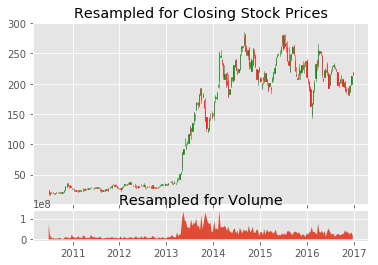

In [72]:
ax1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1 )
ax2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax1 )
ax1.xaxis_date()   
# Candle stick open high low close graph, with rise in prices as green
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax1.set_title("Resampled for Closing Stock Prices")
# Graph the volume of the stock
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values)
ax2.set_title("Resampled for Volume")